In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Visualizing your data
Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame g1800s must be loaded. Your job in this exercise is to create a scatter plot with life expectancy in '1800' on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. 

This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

In [3]:
# Import g1800s
g1800s = pd.read_csv('D:/Springboard_DataCamp/data/Cleaning_Data_in_Python/g1800s.csv')

(20, 55)

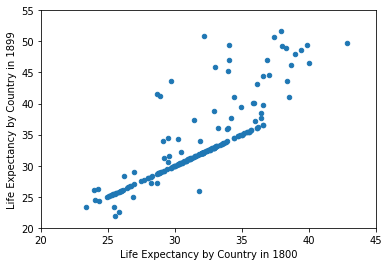

In [5]:
# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 45)
plt.ylim(20, 55)


As you can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

## Thinking about the question at hand
Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

* 'Life expectancy' is the first column (index 0) of the DataFrame.
* The other columns contain either null or numeric values.
* The numeric values are all greater than or equal to 0.
* There is only one instance of each country.

You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [6]:
def check_null_or_valid(row_data):
    """Function that takes a row of data, drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [7]:
# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


## Assembling your data
Here, three DataFrames g1800s, g1900s, and g2000s must be imported. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to concatenate them into a single DataFrame called gapminder. This is a row-wise concatenation, similar to how you concatenated the monthly Uber datasets in Chapter 3.

In [8]:
# Import g1900s and g2000s
g1900s = pd.read_csv('D:/Springboard_DataCamp/data/Cleaning_Data_in_Python/g1900s.csv')
g2000s = pd.read_csv('D:/Springboard_DataCamp/data/Cleaning_Data_in_Python/g2000s.csv')

In [9]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s,g1900s,g2000s])

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
gapminder.head()

(780, 218)


C:\Users\sixsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


## Reshaping your data
Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

In [10]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')
gapminder_melt.head()

,Life expectancy,variable,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [11]:
# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


## Checking the data types
Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that **`country`** is of type **`object`**, **`year`** is of type **`int64`**, and **`life_expectancy`** is of type **`float64.`**

Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the pd.to_numeric() function to convert it to a numeric data type.

In [14]:
print(gapminder_melt.info())
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB


In [15]:
# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes ==np.float64


Since the assert statements did not throw any errors, you can be sure that your columns have the correct data types!

## Looking at country spellings
Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the **`'country'`** column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

* The set of lower and upper case letters.
* Whitespace between words.
* Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - **`str.contains()`** - which takes a regular expression pattern, and applies it to the Series, returning **True** if there is a match, and **False** otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using **`~`**. This Boolean series can then be used to get the Series of countries that have invalid names

In [16]:
# Create the series of countries: countries
countries = gapminder_melt.country
countries

0                         Abkhazia
1                      Afghanistan
2            Akrotiri and Dhekelia
3                          Albania
4                          Algeria
5                   American Samoa
6                          Andorra
7                           Angola
8                         Anguilla
9              Antigua and Barbuda
10                       Argentina
11                         Armenia
12                           Aruba
13                       Australia
14                         Austria
15                      Azerbaijan
16                         Bahamas
17                         Bahrain
18                      Bangladesh
19                        Barbados
20                         Belarus
21                         Belgium
22                          Belize
23                           Benin
24                         Bermuda
25                          Bhutan
26                         Bolivia
27          Bosnia and Herzegovina
28                  

In [17]:
# Drop all the duplicates from countries
countries = countries.drop_duplicates()
countries

0                      Abkhazia
1                   Afghanistan
2         Akrotiri and Dhekelia
3                       Albania
4                       Algeria
5                American Samoa
6                       Andorra
7                        Angola
8                      Anguilla
9           Antigua and Barbuda
10                    Argentina
11                      Armenia
12                        Aruba
13                    Australia
14                      Austria
15                   Azerbaijan
16                      Bahamas
17                      Bahrain
18                   Bangladesh
19                     Barbados
20                      Belarus
21                      Belgium
22                       Belize
23                        Benin
24                      Bermuda
25                       Bhutan
26                      Bolivia
27       Bosnia and Herzegovina
28                     Botswana
29                       Brazil
                 ...           
230     

In [18]:
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
invalid_countries

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object

In [19]:
gapminder_melt.shape


(169260, 3)

## More data cleaning and processing
It's now time to deal with the missing data. There are several strategies for this: 
* You can drop them, 
* fill them in using the mean of the column or row that the missing value is in (also known as **imputation**), 
* or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. 

You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have **NaN** in the life_expectancy column. 

Before doing so, it would be valuable to use assert statements to confirm that year and country do not have any missing values.

In [20]:
# Note the chaining of the .all() method to pd.notnull() to confirm 
# that all values in the column are not null.
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

# Drop the missing values
gapminder = gapminder_melt.dropna()
"""
The .dropna() method has the default keyword arguments axis=0 and how='any', 
which specify that rows with any missing values should be dropped
"""
# Print the shape of gapminder
print(gapminder.shape)

(43857, 3)


## Wrapping up
Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the life_expectancy column. You should not get any values under 0 and you should see something reasonable on the higher end of the life_expectancy age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the life_expectancy column from each subset, and take an average of the values. 

You can achieve this using the .groupby() method. This .groupby() method is covered in greater depth in Manipulating DataFrames with pandas.

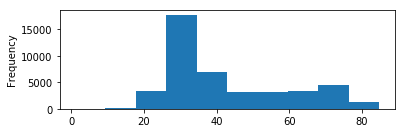

In [21]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

In [22]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


Text(0.5,0,'Year')

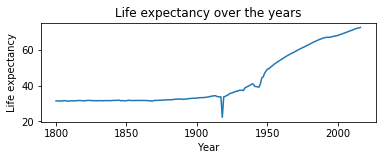

In [23]:
# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')